In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_pacf
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


In [10]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/intro_timeseries/capstone/airmiles.csv',
                index_col='Date',
                parse_dates=True,dayfirst=True)
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [12]:
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq=None)

In [13]:
#index - set it to start of the month
df = df.asfreq('MS')
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [14]:
df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [15]:
#change column airmiles name to y

df.columns=['y']
df.head()



,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [16]:
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


#EDA (Exploratory Data Analysis)

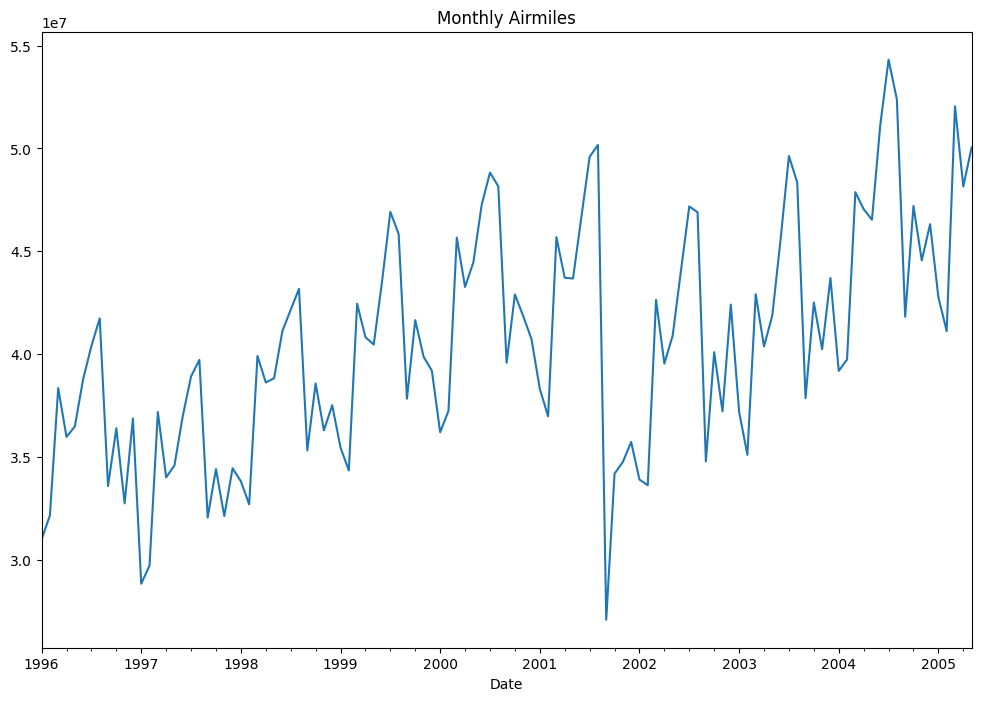

In [17]:
#monthly airmiles

df['y'].plot(figsize=(12,8))
plt.title('Monthly Airmiles')
plt.show()

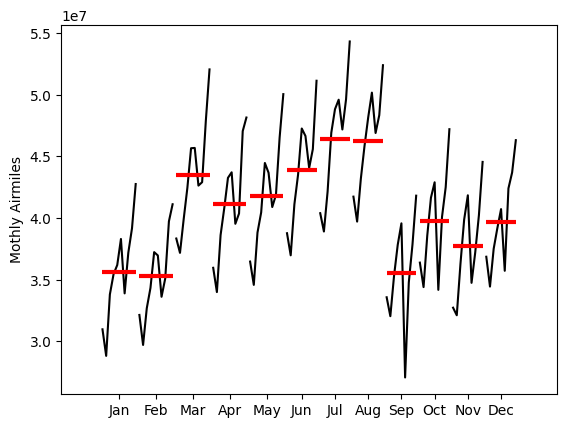

In [20]:
#plotting the monthly seasonality

month_plot(df['y'],ylabel='Mothly Airmiles')

plt.show()

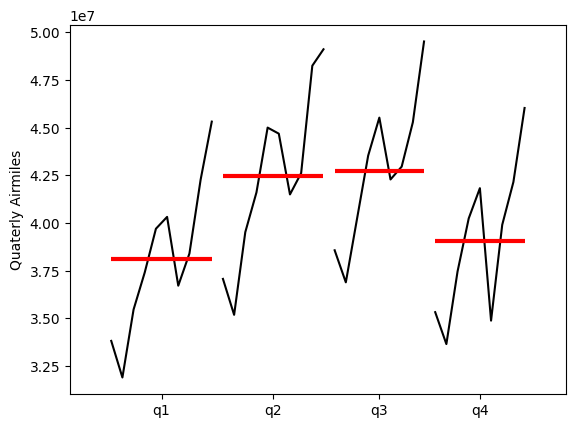

In [25]:
#plotting the quaterly seasonality

quarter_plot(df['y'].resample('QE').mean(),ylabel='Quaterly Airmiles')

plt.show()

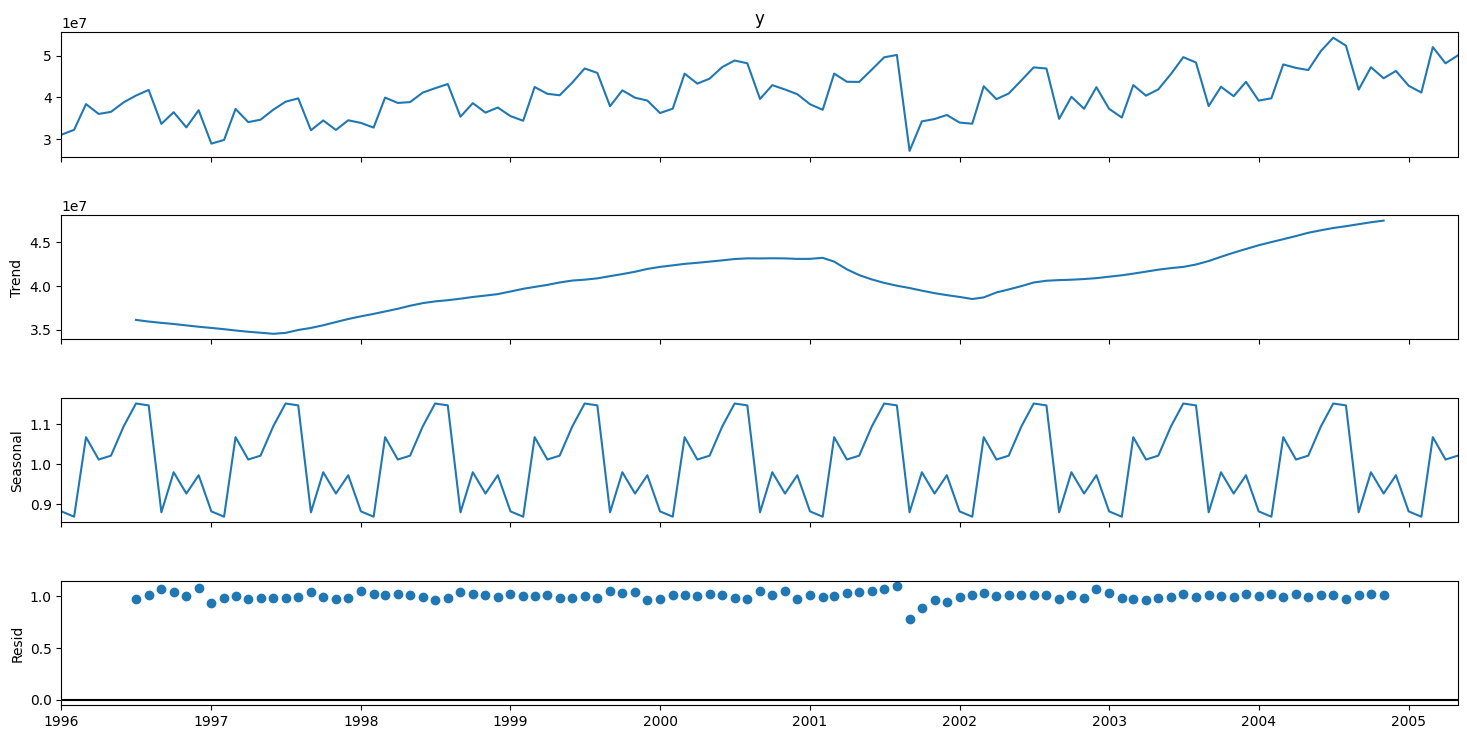

In [29]:
#seasonal decompostion plot for airmiles data

decomposition =seasonal_decompose(df['y'],model='multiplicative',period=12)

fig =decomposition.plot()

fig.set_size_inches(16,8)
plt.show()

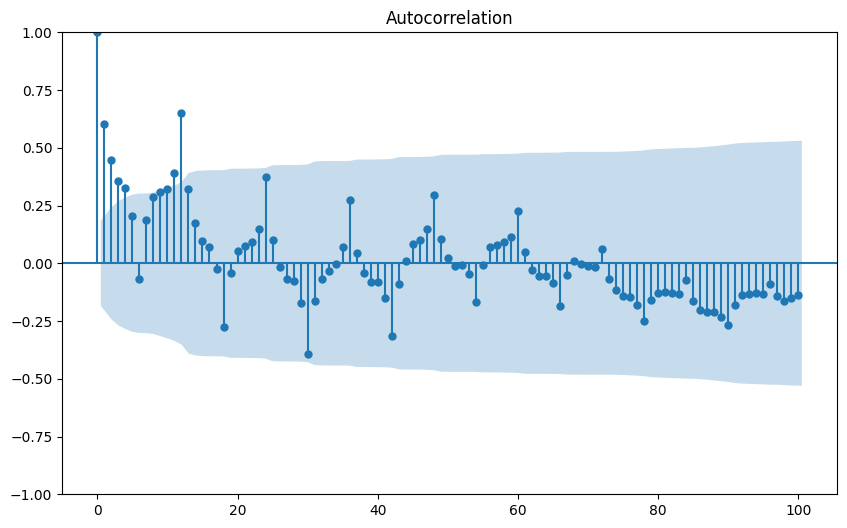

In [30]:
#Plot the autocorrelation (ACF)  airmiles data

fig,ax = plt.subplots(figsize=(10,6))
plot_acf(df['y'],lags=100,ax=ax)
plt.show()

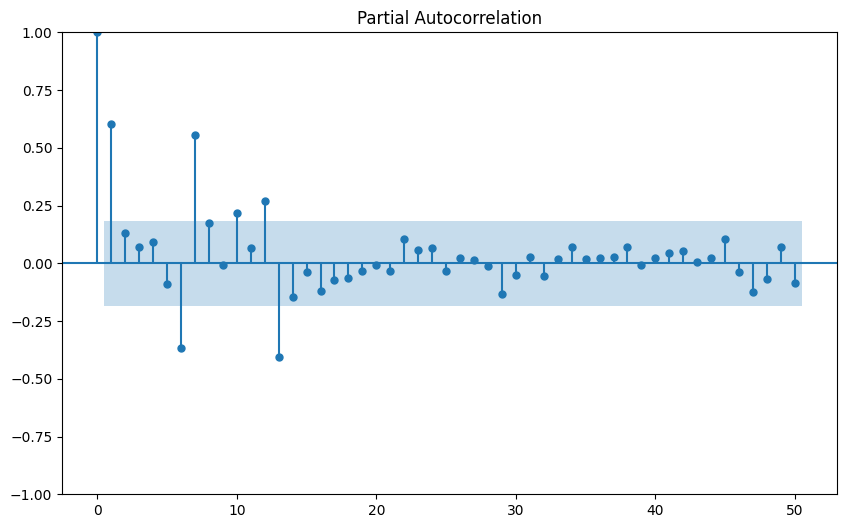

In [31]:
#Plot the partial autocorrelation (PACF)  airmiles data

fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df['y'],lags=50,ax=ax)
plt.show()

#Train and Test split

In [33]:
train,test = df.iloc[:-12],df.iloc[-12:]

print(train.shape)
print(test.shape)

(101, 1)
(12, 1)


In [34]:
test


,y
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665
2004-11-01,44553653
2004-12-01,46316602
2005-01-01,42760657
2005-02-01,41120838


#Holt -Winter model

In [45]:
model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
# model_fit = model.fit()

In [46]:
predictions = model.forecast(len(test)).rename('Holt Winter')

In [47]:
predictions

,Holt Winter
2004-06-01,5.008194e+07
2004-07-01,5.296881e+07
2004-08-01,5.297759e+07
2004-09-01,4.026247e+07
2004-10-01,4.514114e+07
2004-11-01,4.288744e+07
2004-12-01,4.506049e+07
2005-01-01,4.099020e+07
2005-02-01,4.067544e+07
2005-03-01,4.995165e+07


#Model Assesment

In [48]:
#Function to assess model and visualize outcome

def assess_model(model_name,train,test,predictions,chart_title):
  mae=mean_absolute_error(test,predictions)
  rmse=np.sqrt(mean_squared_error(test,predictions))
  mape=mean_absolute_percentage_error(test,predictions)

  print(f'Model:{model_name}')
  print(f'MAE:{mae:.2f}')
  print(f'RMSE:{rmse:.2f}')
  print(f'MAPE:{100 * mape:.2f}%')
  plt.figure(figsize=(10,4))
  plt.plot(train,label='Training')
  plt.plot(test,label='Test')
  plt.plot(predictions,label='Forecast')
  plt.title(chart_title)
  plt.legend()
  plt.show()
  return mae,rmse,mape


Model:Triple Exponential Smoothing
MAE:1375680.30
RMSE:1485759.69
MAPE:2.90%


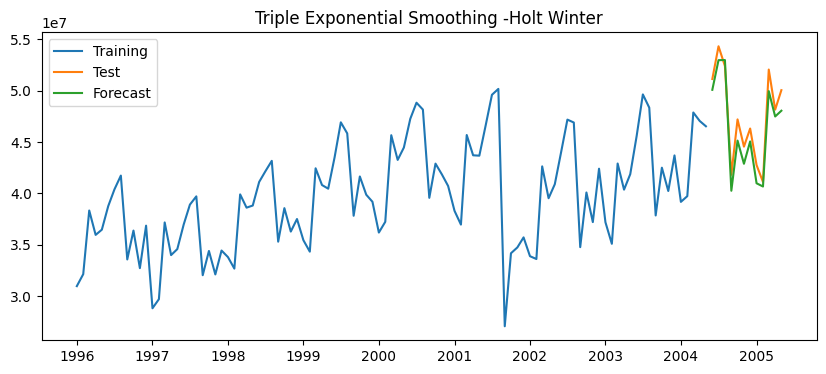

(1375680.3010814663, np.float64(1485759.6937378393), 0.029029177777612405)

In [51]:
assess_model('Triple Exponential Smoothing',train,test,predictions,'Triple Exponential Smoothing -Holt Winter')

#Predicting Future

In [56]:
model = ExponentialSmoothing(df,trend='mul',seasonal='mul',seasonal_periods=12).fit()
predictions = model.forecast(12).rename('Holt Winter')

In [57]:
#Function to plot the future

def plot_future(y,forcast,title):
  plt.figure(figsize=(10,4))
  plt.plot(y,label='Training')
  # plt.plot(test,label='Test')
  plt.plot(forcast,label='Forecast')
  plt.title(f"Train and Forcast with {title}")
  plt.legend()
  plt.show()

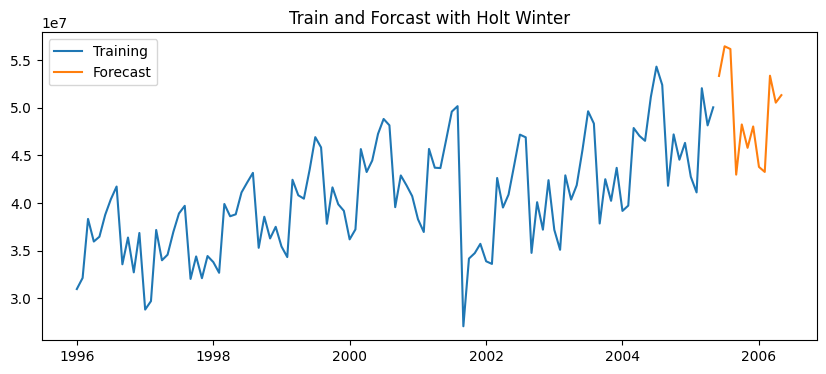

In [58]:
plot_future(df['y'],predictions,'Holt Winter')